# Crypto Price Analysis and World Financial Order

### In the first section we will look at existing crypto data (XRP) and apply data analytics techniques to uncover trends and identify patterns. 

#### Importing required library

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2)
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
root_dir = os.getcwd()
root_dir

'C:\\Users\\shiva\\Desktop\\Research_project\\XRP_project'

In [3]:
## Reading all the csv data
os.listdir(root_dir)
data_path = os.path.join(root_dir,'data')
data_path

'C:\\Users\\shiva\\Desktop\\Research_project\\XRP_project\\data'

#### 1.  Collect data for the year 2023 (months Jan-Dec) from the link below:

In [4]:
csvfile_paths = glob.glob(data_path + "/*.csv")
df = pd.DataFrame()
for path in csvfile_paths:
    temp_df = pd.read_csv(path,header=None)
    print(f"path:{path} , shape:{temp_df.shape}")
    df = pd.concat([df,temp_df],ignore_index=True)
print("===============================")
print(f"combine data: {df.shape}")   
df.to_csv("2023_XRP_data.csv",index=False)

path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-01.csv , shape:(31, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-02.csv , shape:(28, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-03.csv , shape:(31, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-04.csv , shape:(30, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-05.csv , shape:(31, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-06.csv , shape:(30, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-07.csv , shape:(31, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-08.csv , shape:(31, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-09.csv , shape:(30, 12)
path:C:\Users\shiva\Desktop\Research_project\XRP_project\data\XRPUSDT-1d-2023-10.c

- After combing we recevied 334 rows

- Note: This is a very less data we have.

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


In [6]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [7]:
df.shape

(334, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       334 non-null    int64  
 1   1       334 non-null    float64
 2   2       334 non-null    float64
 3   3       334 non-null    float64
 4   4       334 non-null    float64
 5   5       334 non-null    float64
 6   6       334 non-null    int64  
 7   7       334 non-null    float64
 8   8       334 non-null    int64  
 9   9       334 non-null    float64
 10  10      334 non-null    float64
 11  11      334 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 31.4 KB


#### 2. Importing final dataset file

In [9]:
import pandas as pd
final_df = pd.read_csv("2023_XRP_data.csv")
final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


#### 3&4. This parameters/features from  SPOT -> Klines  git repo provided in question

In [10]:
columns = ["Open time",
           "Open",
           "High",
           "Low",
           "Close",
           "Volume",
           "Close time",
           "Quote asset volume",
           "Number of trades",
           "Taker buy base asset volume",
           "Taker buy quote asset volume",
           "Ignore"]
final_df.columns = columns

- **Open time:** This is the timestamp when the trading period began or opened.

- **Open:** This is the opening or beginning price when the trading period began.

- **High:** This is the highest price reached during the specific trading period.

- **Low:** This is the lowest price recorded during the trading period.

- **Close:** This is the closing price of the trading period, the price the trading closed.

- **Volume:** This is the trading volume during the period. The entire trade volume for the period of trade

- **Close time:** This is the timestamp when the trading period closed.

- **Quote asset volume:** This is the volume of the quoted asset (usually in terms of the base cryptocurrency).

- **Number of trades:** This is the total number of trades that occurred.

- **Taker buy base asset volume:** Volume bought by takers (market orders) in terms of the base cryptocurrency.

- **Taker buy quote asset volume:** Volume bought by takers in terms of the quoted asset.

- **Ignore:** A column for remarks.

##### Data Formating

In [11]:
dict = {"Open time":"open_time",
           "Open":"open",
           "High":"high",
           "Low":"low",
           "Close":"close",
           "Volume":"volume",
           "Close time":"close_time",
           "Quote asset volume":"quote_asset_volume",
           "Number of trades":"number_of_trades",
           "Taker buy base asset volume":"taker_buy_base_asset_volume",
           "Taker buy quote asset volume":"taker_buy_quote_asset_volume",
           "Ignore":"ignore"}
 
# call rename () method
final_df.rename(columns=dict,
          inplace=True)

## ========================================================================== 

#### 5. Clean the data for duplicates, missing values and any formatting errors. Specify a summary of cleaning done and results achieved

In [12]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


In [13]:
# Check Null Values
final_df.isnull().sum()

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open_time                     334 non-null    int64  
 1   open                          334 non-null    float64
 2   high                          334 non-null    float64
 3   low                           334 non-null    float64
 4   close                         334 non-null    float64
 5   volume                        334 non-null    float64
 6   close_time                    334 non-null    int64  
 7   quote_asset_volume            334 non-null    float64
 8   number_of_trades              334 non-null    int64  
 9   taker_buy_base_asset_volume   334 non-null    float64
 10  taker_buy_quote_asset_volume  334 non-null    float64
 11  ignore                        334 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 31.4 KB


##### Check Duplicate Data in our DataFrame

In [15]:
final_df.duplicated(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 334, dtype: bool

In [16]:
final_df.duplicated().sum()

0

- There is no duplicate value present in the dataset.

##### Check Missing Values in our DataFrame

In [17]:
final_df.isnull().sum()

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

- There is no null value present in datset.

##### Conclusion
- There is no duplicate value present in the dataset.
- There is no missing value present in dataset.

# Question-6  Perform descriptive analysis

In [18]:
# performing basic statistics
final_df.describe()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,3.340000e+02,334.000000,334.000000,334.000000,334.000000,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02,334.0
mean,1.686917e+12,0.500815,0.513903,0.486687,0.501621,3.687655e+08,1.687003e+12,1.885232e+08,2.217749e+05,1.861700e+08,9.505041e+07,0.0
std,8.342933e+09,0.099628,0.105421,0.094432,0.099406,2.409843e+08,8.342933e+09,1.528390e+08,2.182125e+05,1.208037e+08,7.652807e+07,0.0
min,1.672531e+12,0.338000,0.340000,0.300000,0.338000,6.313711e+07,1.672618e+12,3.298534e+07,3.836700e+04,2.745739e+07,1.434515e+07,0.0
25%,1.679724e+12,0.425475,0.433250,0.411675,0.426250,2.372122e+08,1.679810e+12,1.129748e+08,1.204495e+05,1.203629e+08,5.686124e+07,0.0
50%,1.686917e+12,0.495200,0.503450,0.482900,0.496000,3.311161e+08,1.687003e+12,1.531889e+08,1.674470e+05,1.700359e+08,8.066119e+07,0.0
75%,1.694110e+12,0.530150,0.546875,0.515925,0.531450,4.275825e+08,1.694196e+12,2.177888e+08,2.474530e+05,2.185932e+08,1.090932e+08,0.0
max,1.701302e+12,0.819800,0.938000,0.771000,0.819900,2.499971e+09,1.701389e+12,1.758483e+09,2.895839e+06,1.283335e+09,9.024119e+08,0.0


In [19]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open_time,334.0,1.686917e+12,8.342933e+09,1.672531e+12,1.679724e+12,1.686917e+12,1.694110e+12,1.701302e+12
open,334.0,5.008153e-01,9.962790e-02,3.380000e-01,4.254750e-01,4.952000e-01,5.301500e-01,8.198000e-01
high,334.0,5.139027e-01,1.054209e-01,3.400000e-01,4.332500e-01,5.034500e-01,5.468750e-01,9.380000e-01
low,334.0,4.866868e-01,9.443174e-02,3.000000e-01,4.116750e-01,4.829000e-01,5.159250e-01,7.710000e-01
close,334.0,5.016213e-01,9.940615e-02,3.380000e-01,4.262500e-01,4.960000e-01,5.314500e-01,8.199000e-01
volume,334.0,3.687655e+08,2.409843e+08,6.313711e+07,2.372122e+08,3.311161e+08,4.275825e+08,2.499971e+09
close_time,334.0,1.687003e+12,8.342933e+09,1.672618e+12,1.679810e+12,1.687003e+12,1.694196e+12,1.701389e+12
quote_asset_volume,334.0,1.885232e+08,1.528390e+08,3.298534e+07,1.129748e+08,1.531889e+08,2.177888e+08,1.758483e+09
number_of_trades,334.0,2.217749e+05,2.182125e+05,3.836700e+04,1.204495e+05,1.674470e+05,2.474530e+05,2.895839e+06
taker_buy_base_asset_volume,334.0,1.861700e+08,1.208037e+08,2.745739e+07,1.203629e+08,1.700359e+08,2.185932e+08,1.283335e+09


#### Basic Statistics Conclusion:

###### Volume traded:
**Volume Range:** The data shows a wide variety of trading volumes ranging from a minimum of 6.313711e+07 to a maximum of 2.499971e+09 throughout the year.
With the 75th percentile being about 4.283734e+08 units and the 25th percentile being about 2.375146e+08 units

###### Price Range:
**Opening Price:** The data shows the minimum opening price of 0.3380 and the maximum opening price of 0.8198 through the year.With the 75th percentile being about 0.5302 and the 25th percentile being about 0.4260.The mean price of the opening trade is 0.5013

**Closing Price:** The data shows the minimum closing price of 0.3380 and the maximum closing price of 0.8199 through the year.With the 75th percentile being about 0.5319 and the 25th percentile being about 0.4273.The mean price of the opening trade is 0.5021

#### There are 333 records in the dataset.

- The data is from  02 Jan 2023 to 29 Nov 2023.

- The mean price of the opening trade is 0.5013

- The mean price of the closing trade is 0.5021

- The mean price of the volume is 3.6957 + e08

- The mean number of trades is 2.222948e+05

##### Showing Distribution for each column

In [20]:
final_df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

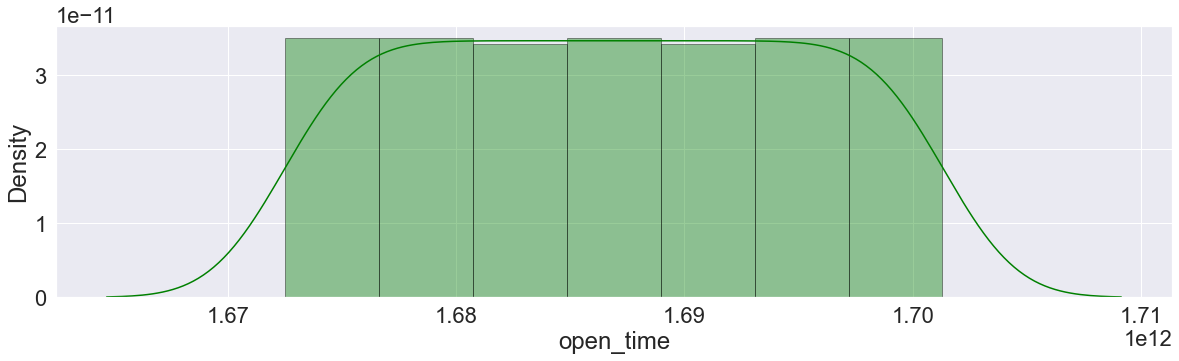

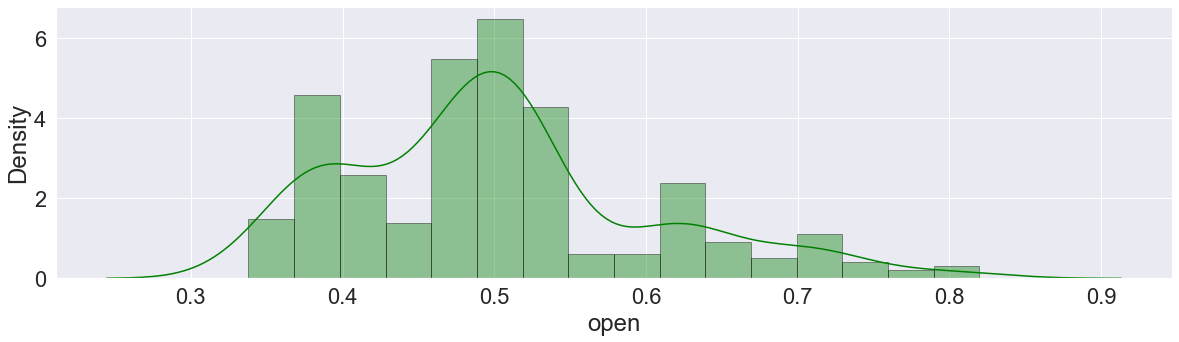

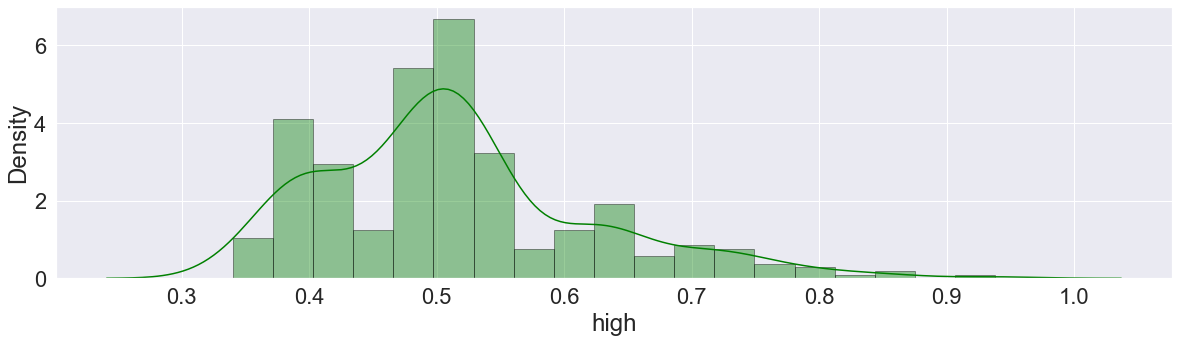

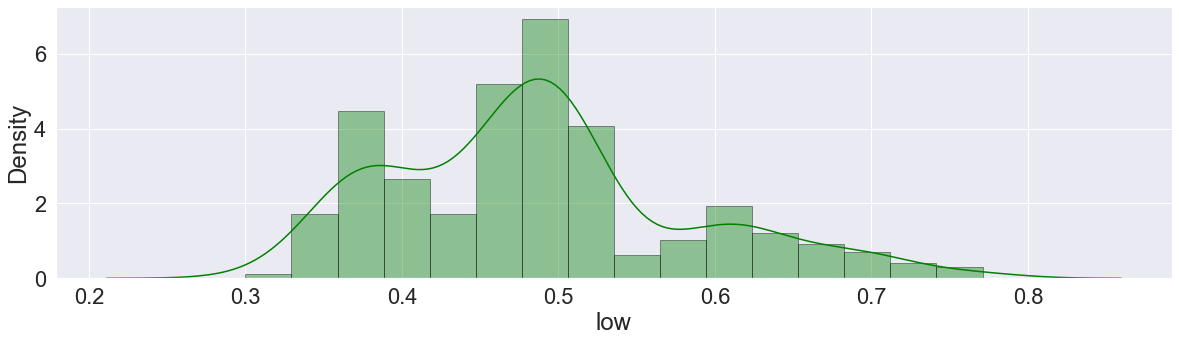

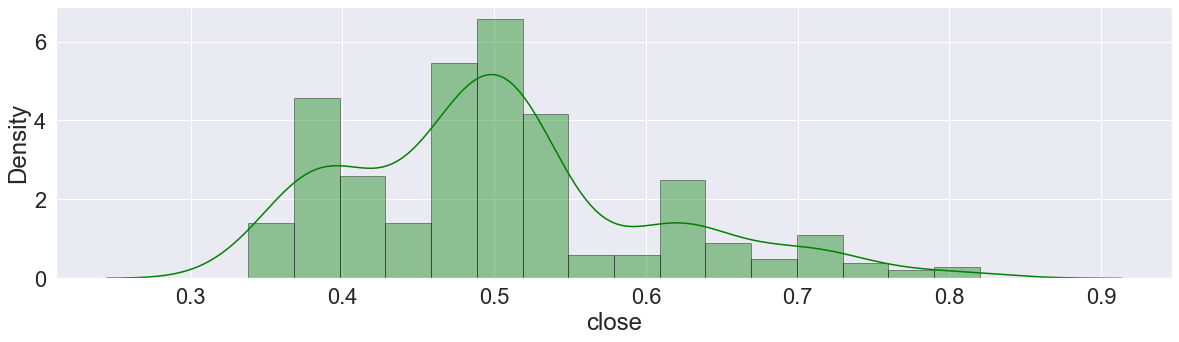

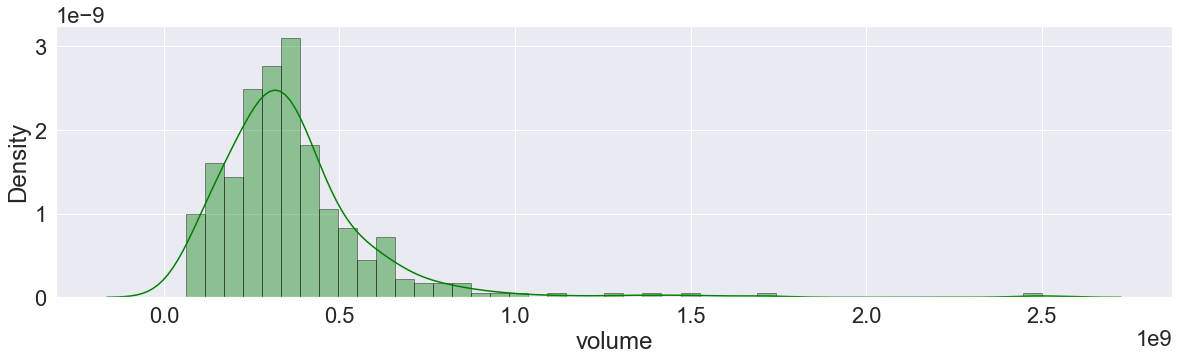

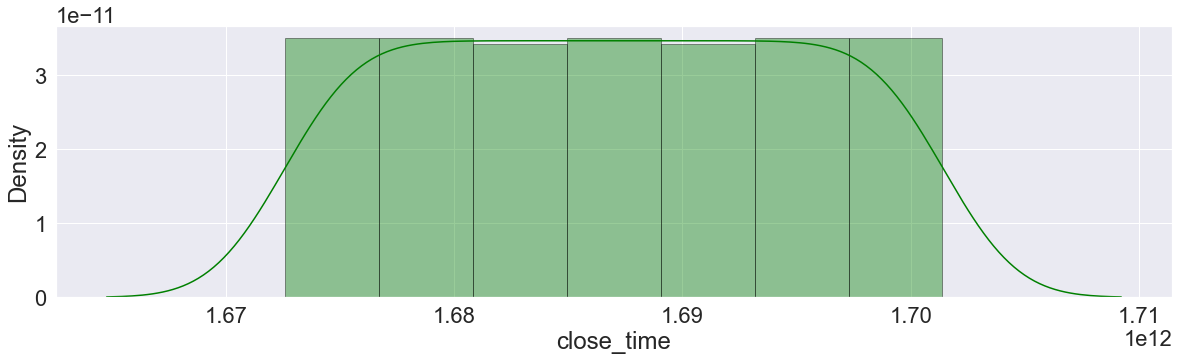

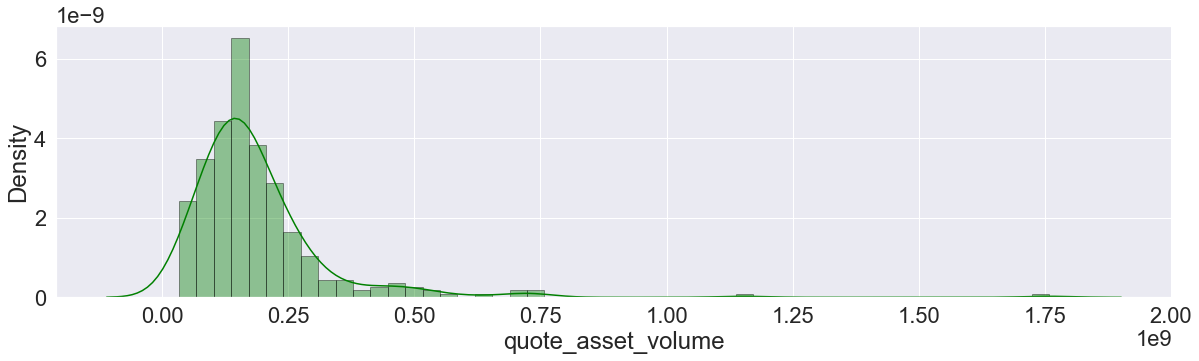

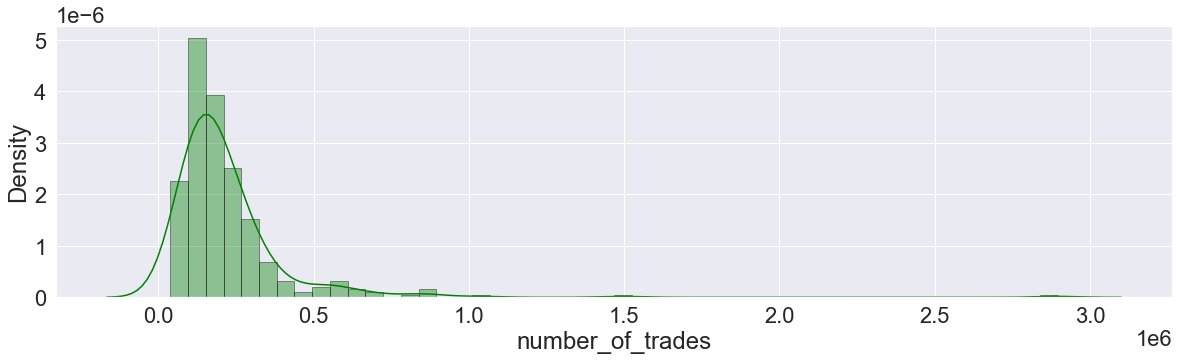

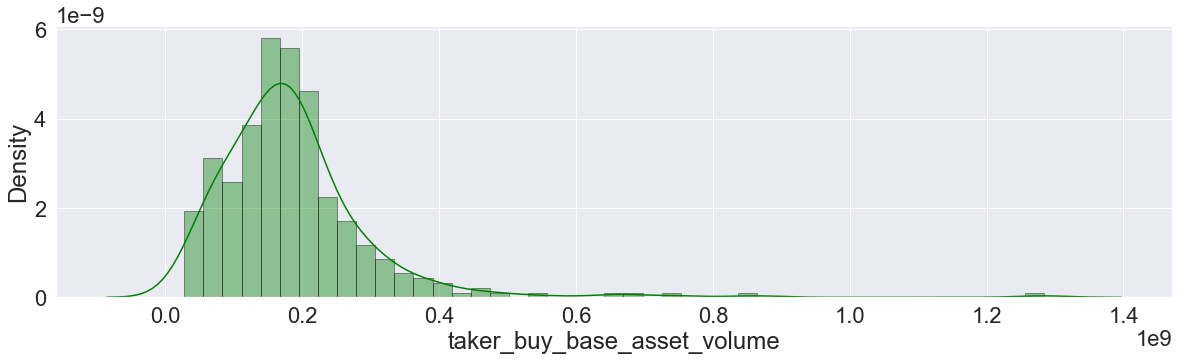

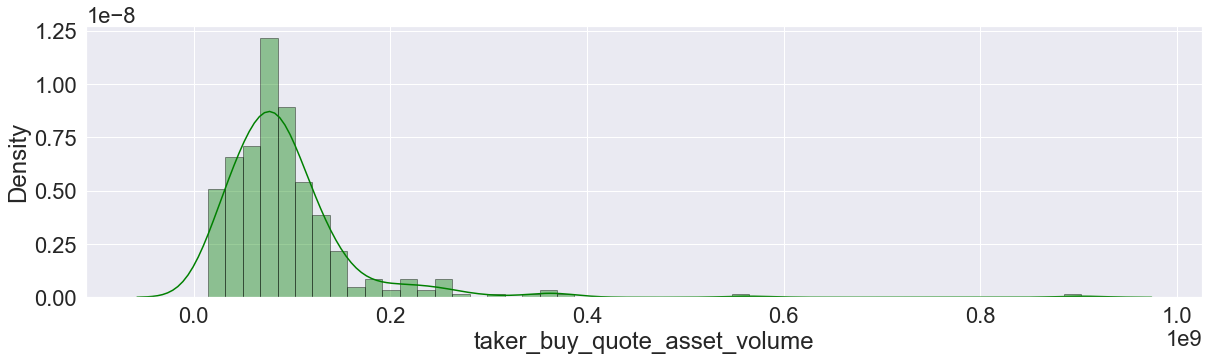

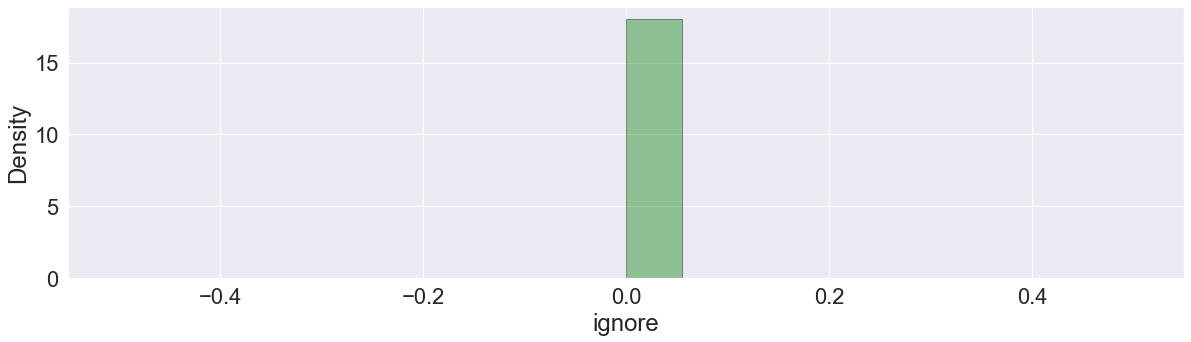

In [21]:
for clm in final_df.columns:
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(a=final_df[clm], color='green',hist_kws={"edgecolor": 'black'})
    plt.show()

##### BONUS 1: What additional statistical information will be meaningful. Give formulas and calculate values

In [157]:
df = final_df.copy()

In [159]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades
0,338.9,340.0,335.4,338.7,102026821.0,3.447164e+07,48661
1,338.6,355.5,300.0,348.2,647520487.0,2.178040e+08,285660
2,348.2,352.0,339.5,343.6,346410334.0,1.195113e+08,154113
3,343.6,360.5,339.0,347.2,372672796.0,1.295853e+08,147677
4,347.1,348.7,333.3,338.0,265529668.0,9.073585e+07,106910


In [167]:
# Calculate Daily Returns
df['daily_return'] = df['close'].pct_change() * 100
df.head(2)

,open,high,low,close,volume,quote_asset_volume,number_of_trades,price_change,rsi,daily_return
0,1970-01-01 00:00:00.000000338,340.0,335.4,338.7,102026821.0,3.447164e+07,48661,NaN,NaN,NaN
1,1970-01-01 00:00:00.000000338,355.5,300.0,348.2,647520487.0,2.178040e+08,285660,9.5,100.0,2.804842


In [173]:
#Average True Range (ATR)
df['true_range'] = df.apply(lambda row: max(row['high'] - row['low'], abs(row['high'] - row['close']), abs(row['close'] - row['low'])), axis=1)
df['atr'] = df['true_range'].rolling(window=14).mean()
df.head(2)

##### BONUS 2: To Calculate the RSI, we need to follow the below steps

1. Compute daily price changes.
2. Separate the gains and losses.
3. Calculate the average gain and average loss over a specified period.
4. Calculate the relative strength (RS).
5. Calculate the RSI using the formula.

In [162]:
import pandas as pd

# Assuming df is your DataFrame with the provided features
# Convert 'open_time' to datetime format
df['open'] = pd.to_datetime(df['open'], errors='coerce')

# Calculate daily price changes
df['price_change'] = df['close'].diff()

# Separate gains and losses
gains = df['price_change'].apply(lambda x: x if x > 0 else 0)
losses = -df['price_change'].apply(lambda x: x if x < 0 else 0)


In [163]:

# Calculate average gain and average loss over a specified period (e.g., 14 days)
window = 14
avg_gain = gains.rolling(window=window, min_periods=1).mean()
avg_loss = losses.rolling(window=window, min_periods=1).mean()

# Calculate relative strength (RS)
rs = avg_gain / avg_loss

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

# Add RSI column to the DataFrame
df['rsi'] = rsi


In [164]:

# Display the DataFrame with RSI
print(df[['open', 'close', 'rsi']].head())


                           open  close         rsi
0 1970-01-01 00:00:00.000000338  338.7         NaN
1 1970-01-01 00:00:00.000000338  348.2  100.000000
2 1970-01-01 00:00:00.000000348  343.6   67.375887
3 1970-01-01 00:00:00.000000343  347.2   74.011299
4 1970-01-01 00:00:00.000000347  338.0   48.698885


# Exdploratory Data Analysis

##### Opening trend

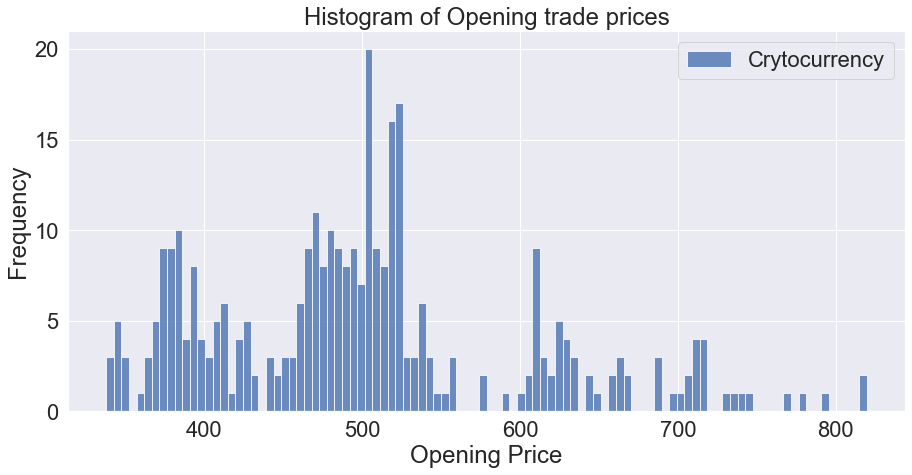

In [34]:
plt.figure(figsize=(15, 7))
plt.hist(final_df['open'], bins=100, label='Crytocurrency', alpha=0.8)
plt.title('Histogram of Opening trade prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

##### volume trend

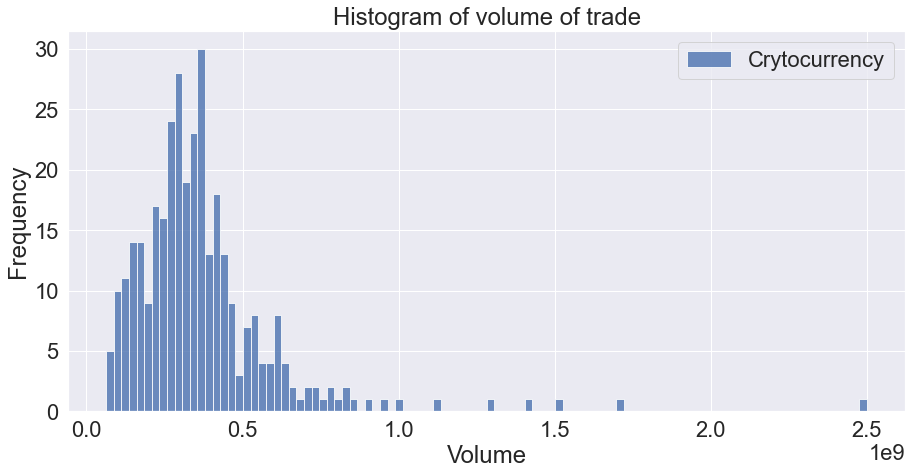

In [35]:
plt.figure(figsize=(15, 7))
plt.hist(final_df['volume'], bins=100, label='Crytocurrency', alpha=0.8)
plt.title('Histogram of volume of trade')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

##### volume trend over time

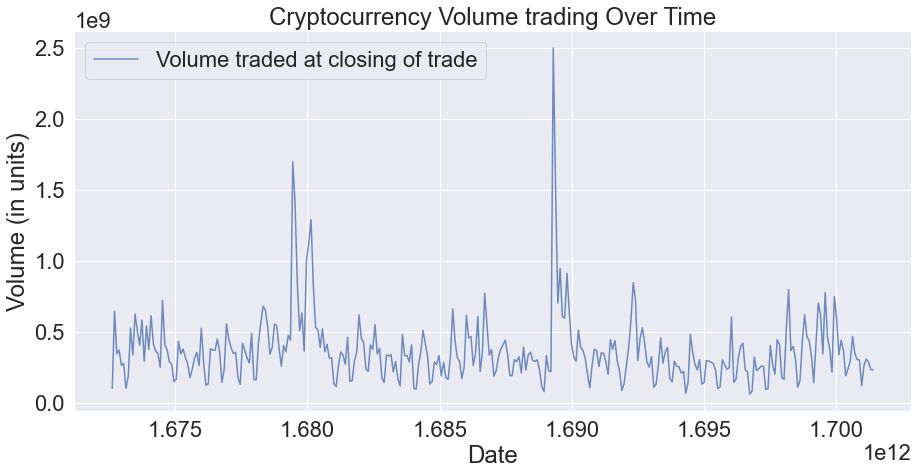

In [36]:
plt.figure(figsize=(15, 7))
# plt.plot(df['Close time'], df['Open'], label='BTCUSD', alpha=0.8)
# plt.plot(df['Close time'], df['Close'], label='ETHUSD', alpha=0.8)
plt.plot(final_df['close_time'], final_df['volume'], label='Volume traded at closing of trade', alpha=0.8)
plt.title('Cryptocurrency Volume trading Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in units)')
plt.legend()
plt.grid(True)
plt.show()

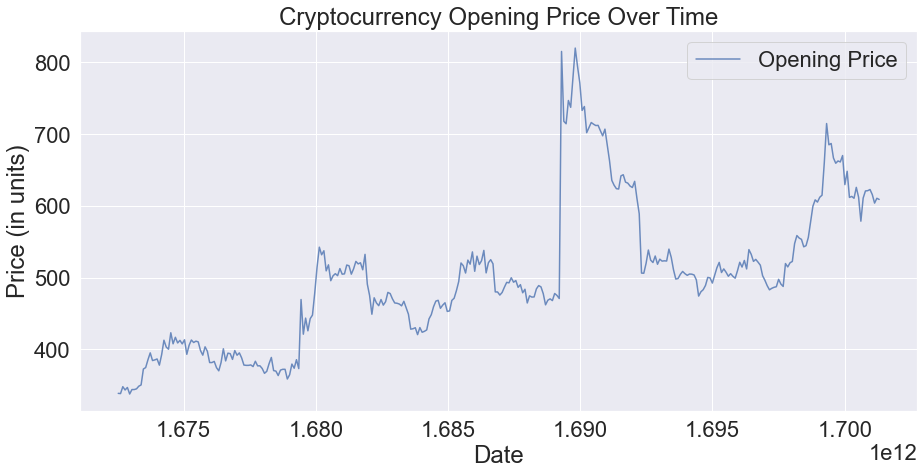

In [37]:
plt.figure(figsize=(15, 7))
plt.plot(final_df['open_time'], final_df['open'], label='Opening Price', alpha=0.8)
plt.title('Cryptocurrency Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in units)')
plt.legend()
plt.grid(True)
plt.show()

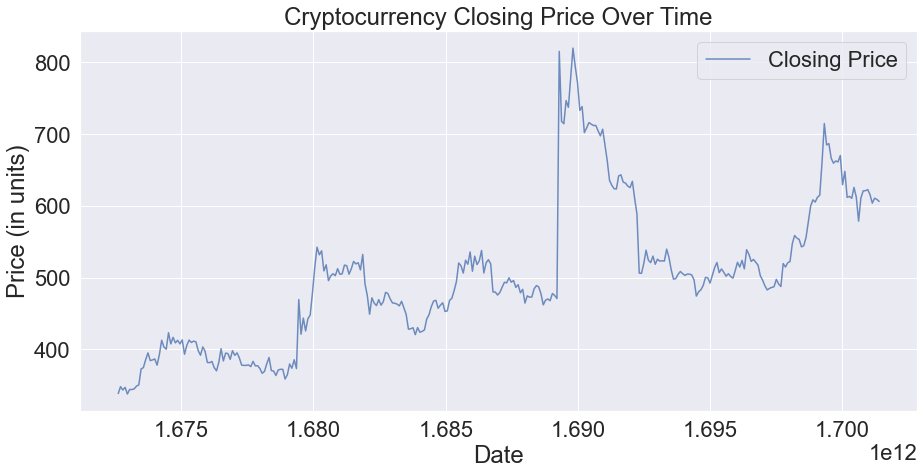

In [38]:
plt.figure(figsize=(15, 7))
plt.plot(final_df['close_time'], final_df['close'], label='Closing Price', alpha=0.8)
plt.title('Cryptocurrency Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in units)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df1 = final_df.copy()
df1['Daily_Return'] = df1['close'].pct_change()

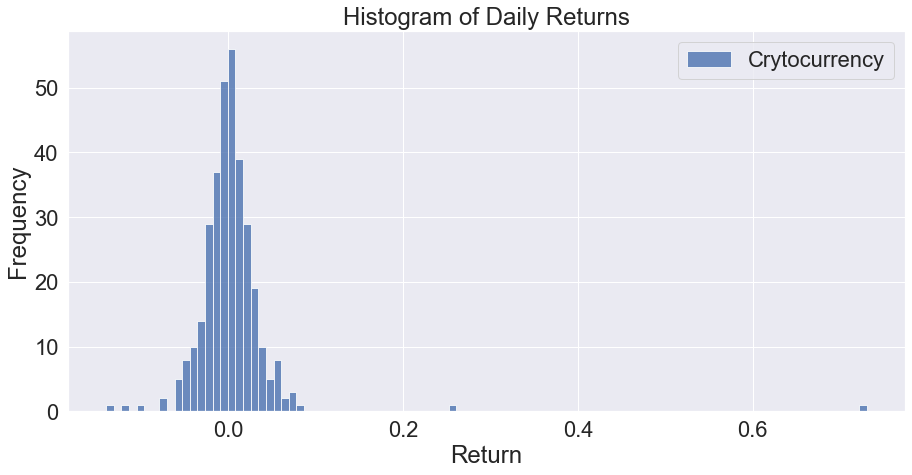

In [40]:
plt.figure(figsize=(15, 7))
plt.hist(df1['Daily_Return'].dropna(), bins=100, label='Crytocurrency', alpha=0.8)
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df1.index,
                                     open=df1['open'],
                                     high=df1['high'],
                                     low=df1['low'],
                                     close=df1['close'])])

# Add text annotation as a makeshift legend
fig.add_annotation(
    text='Open/High/Low/Close',
    align='left',
    valign='top',
    xref='paper', yref='paper',
    x=1, y=1,
    showarrow=False,
)

# Set font size for the annotation
fig.update_annotations(font_size=12)

fig.show()


In [30]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661,53592277.0,1.810790e+07,0
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660,320823575.0,1.080569e+08,0
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113,172318472.0,5.944846e+07,0
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677,193027855.0,6.713928e+07,0
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910,129294274.0,4.418781e+07,0


In [31]:
# Drop unwanted columns
final_df.drop([ 'ignore', 
               'taker_buy_base_asset_volume', 
               'taker_buy_quote_asset_volume'], axis=1, inplace=True)

In [32]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades
0,1672531200000,0.3389,0.3400,0.3354,0.3387,102026821.0,1672617599999,3.447164e+07,48661
1,1672617600000,0.3386,0.3555,0.3000,0.3482,647520487.0,1672703999999,2.178040e+08,285660
2,1672704000000,0.3482,0.3520,0.3395,0.3436,346410334.0,1672790399999,1.195113e+08,154113
3,1672790400000,0.3436,0.3605,0.3390,0.3472,372672796.0,1672876799999,1.295853e+08,147677
4,1672876800000,0.3471,0.3487,0.3333,0.3380,265529668.0,1672963199999,9.073585e+07,106910


In [33]:
final_df[['open', 'high', 'low', 'close']] = final_df[['open', 'high', 'low', 'close']] * 1000
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades
0,1672531200000,338.9,340.0,335.4,338.7,102026821.0,1672617599999,3.447164e+07,48661
1,1672617600000,338.6,355.5,300.0,348.2,647520487.0,1672703999999,2.178040e+08,285660
2,1672704000000,348.2,352.0,339.5,343.6,346410334.0,1672790399999,1.195113e+08,154113
3,1672790400000,343.6,360.5,339.0,347.2,372672796.0,1672876799999,1.295853e+08,147677
4,1672876800000,347.1,348.7,333.3,338.0,265529668.0,1672963199999,9.073585e+07,106910


In [42]:
final_df['open_time'] = pd.to_datetime(final_df['open_time'] / 1000, unit='s', origin='unix')

In [43]:
final_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades
0,2023-01-01,338.9,340.0,335.4,338.7,102026821.0,1672617599999,3.447164e+07,48661
1,2023-01-02,338.6,355.5,300.0,348.2,647520487.0,1672703999999,2.178040e+08,285660
2,2023-01-03,348.2,352.0,339.5,343.6,346410334.0,1672790399999,1.195113e+08,154113
3,2023-01-04,343.6,360.5,339.0,347.2,372672796.0,1672876799999,1.295853e+08,147677
4,2023-01-05,347.1,348.7,333.3,338.0,265529668.0,1672963199999,9.073585e+07,106910
...,...,...,...,...,...,...,...,...,...
329,2023-11-26,622.8,637.5,606.4,615.7,266307412.0,1701043199999,1.658034e+08,197951
330,2023-11-27,615.7,616.8,593.7,603.9,309411406.0,1701129599999,1.872490e+08,209511
331,2023-11-28,603.9,613.9,595.7,610.7,286127938.0,1701215999999,1.732551e+08,168089
332,2023-11-29,610.6,617.0,604.0,609.1,235341461.0,1701302399999,1.436455e+08,135873


In [44]:
final_df['close_time'] = pd.to_datetime(final_df['close_time'] / 1000, unit='s', origin='unix')

In [45]:
final_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades
0,2023-01-01,338.9,340.0,335.4,338.7,102026821.0,2023-01-01 23:59:59.999000072,3.447164e+07,48661
1,2023-01-02,338.6,355.5,300.0,348.2,647520487.0,2023-01-02 23:59:59.999000072,2.178040e+08,285660
2,2023-01-03,348.2,352.0,339.5,343.6,346410334.0,2023-01-03 23:59:59.999000072,1.195113e+08,154113
3,2023-01-04,343.6,360.5,339.0,347.2,372672796.0,2023-01-04 23:59:59.999000072,1.295853e+08,147677
4,2023-01-05,347.1,348.7,333.3,338.0,265529668.0,2023-01-05 23:59:59.999000072,9.073585e+07,106910
...,...,...,...,...,...,...,...,...,...
329,2023-11-26,622.8,637.5,606.4,615.7,266307412.0,2023-11-26 23:59:59.999000072,1.658034e+08,197951
330,2023-11-27,615.7,616.8,593.7,603.9,309411406.0,2023-11-27 23:59:59.999000072,1.872490e+08,209511
331,2023-11-28,603.9,613.9,595.7,610.7,286127938.0,2023-11-28 23:59:59.999000072,1.732551e+08,168089
332,2023-11-29,610.6,617.0,604.0,609.1,235341461.0,2023-11-29 23:59:59.999000072,1.436455e+08,135873


In [46]:
# Extract date and time into separate columns
final_df['Date_close'] = final_df['close_time'].dt.date
final_df['Time_close'] = final_df['close_time'].dt.time

In [47]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,Date_close,Time_close
0,2023-01-01,338.9,340.0,335.4,338.7,102026821.0,2023-01-01 23:59:59.999000072,3.447164e+07,48661,2023-01-01,23:59:59.999000
1,2023-01-02,338.6,355.5,300.0,348.2,647520487.0,2023-01-02 23:59:59.999000072,2.178040e+08,285660,2023-01-02,23:59:59.999000
2,2023-01-03,348.2,352.0,339.5,343.6,346410334.0,2023-01-03 23:59:59.999000072,1.195113e+08,154113,2023-01-03,23:59:59.999000
3,2023-01-04,343.6,360.5,339.0,347.2,372672796.0,2023-01-04 23:59:59.999000072,1.295853e+08,147677,2023-01-04,23:59:59.999000
4,2023-01-05,347.1,348.7,333.3,338.0,265529668.0,2023-01-05 23:59:59.999000072,9.073585e+07,106910,2023-01-05,23:59:59.999000


##### Are there certain months where prices are higher / lower than normal?

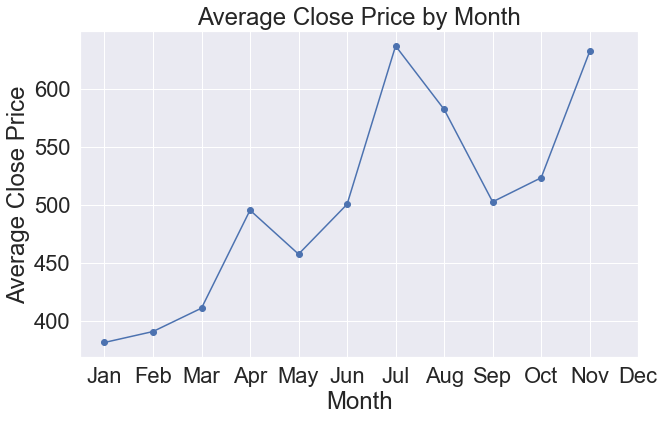

In [48]:
#final_df['open_time'] = pd.to_datetime(final_df['open_time'] / 1000, unit='s', origin='unix')

# Extract the month from the timestamp
final_df['Month'] = final_df['open_time'].dt.month

# Group by month and calculate the average close price for each month
monthly_avg_close = final_df.groupby('Month')['close'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_avg_close.plot(marker='o')
plt.title('Average Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

- Higher price: July and Dec
- Lower price: Jan
- Normal price: May and June

In [49]:
final_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,Date_close,Time_close,Month
0,2023-01-01,338.9,340.0,335.4,338.7,102026821.0,2023-01-01 23:59:59.999000072,3.447164e+07,48661,2023-01-01,23:59:59.999000,1
1,2023-01-02,338.6,355.5,300.0,348.2,647520487.0,2023-01-02 23:59:59.999000072,2.178040e+08,285660,2023-01-02,23:59:59.999000,1
2,2023-01-03,348.2,352.0,339.5,343.6,346410334.0,2023-01-03 23:59:59.999000072,1.195113e+08,154113,2023-01-03,23:59:59.999000,1
3,2023-01-04,343.6,360.5,339.0,347.2,372672796.0,2023-01-04 23:59:59.999000072,1.295853e+08,147677,2023-01-04,23:59:59.999000,1
4,2023-01-05,347.1,348.7,333.3,338.0,265529668.0,2023-01-05 23:59:59.999000072,9.073585e+07,106910,2023-01-05,23:59:59.999000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
329,2023-11-26,622.8,637.5,606.4,615.7,266307412.0,2023-11-26 23:59:59.999000072,1.658034e+08,197951,2023-11-26,23:59:59.999000,11
330,2023-11-27,615.7,616.8,593.7,603.9,309411406.0,2023-11-27 23:59:59.999000072,1.872490e+08,209511,2023-11-27,23:59:59.999000,11
331,2023-11-28,603.9,613.9,595.7,610.7,286127938.0,2023-11-28 23:59:59.999000072,1.732551e+08,168089,2023-11-28,23:59:59.999000,11
332,2023-11-29,610.6,617.0,604.0,609.1,235341461.0,2023-11-29 23:59:59.999000072,1.436455e+08,135873,2023-11-29,23:59:59.999000,11


##### Is there a correlation between “Volume” and “Quote Asset Volume”?

In [50]:
import pandas as pd

# Assuming df is your DataFrame with the provided features
# If the columns are not in numeric format, convert them to numeric
final_df['Volume'] = pd.to_numeric(final_df['volume'], errors='coerce')
final_df['quote_asset_volume'] = pd.to_numeric(final_df['quote_asset_volume'], errors='coerce')

# Calculate the correlation
correlation = final_df['volume'].corr(final_df['quote_asset_volume'])

print(f"Correlation between Volume and Quote Asset Volume: {correlation}")

Correlation between Volume and Quote Asset Volume: 0.9391696845341847


- The **correlation** value will be between -1 and 1. A value closer to 1 indicates a positive correlation, while a value closer to -1 indicates a negative correlation. A value around 0 suggests a weak or no correlation.

##### Is there a trend in “Number of trades”? What does it specify?

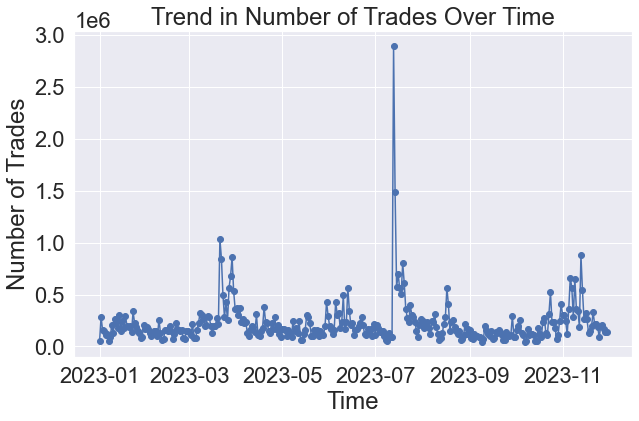

In [51]:
# Plot the trend of 'Number of trades' over time
plt.figure(figsize=(10, 6))
plt.plot(final_df['open_time'], final_df['number_of_trades'], marker='o', linestyle='-')
plt.title('Trend in Number of Trades Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.show()

- The **"Number of trades"** represents the total number of trades that occurred during a specific time period. A rising trend might indicate increased market activity, while a declining trend may suggest reduced trading interest. Understanding the trend can provide insights into market dynamics and investor sentiment.

## Model Training

In [52]:
final_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,Date_close,Time_close,Month,Volume
0,2023-01-01,338.9,340.0,335.4,338.7,102026821.0,2023-01-01 23:59:59.999000072,3.447164e+07,48661,2023-01-01,23:59:59.999000,1,102026821.0
1,2023-01-02,338.6,355.5,300.0,348.2,647520487.0,2023-01-02 23:59:59.999000072,2.178040e+08,285660,2023-01-02,23:59:59.999000,1,647520487.0
2,2023-01-03,348.2,352.0,339.5,343.6,346410334.0,2023-01-03 23:59:59.999000072,1.195113e+08,154113,2023-01-03,23:59:59.999000,1,346410334.0
3,2023-01-04,343.6,360.5,339.0,347.2,372672796.0,2023-01-04 23:59:59.999000072,1.295853e+08,147677,2023-01-04,23:59:59.999000,1,372672796.0
4,2023-01-05,347.1,348.7,333.3,338.0,265529668.0,2023-01-05 23:59:59.999000072,9.073585e+07,106910,2023-01-05,23:59:59.999000,1,265529668.0


In [53]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [54]:
# Drop unwanted columns
final_df.drop([ 'open_time', 
               'close_time', 
               'Date_close',
              'Time_close',
              'Month',
              'Volume'], axis=1, inplace=True)

In [55]:
final_df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades
0,338.9,340.0,335.4,338.7,102026821.0,3.447164e+07,48661
1,338.6,355.5,300.0,348.2,647520487.0,2.178040e+08,285660
2,348.2,352.0,339.5,343.6,346410334.0,1.195113e+08,154113
3,343.6,360.5,339.0,347.2,372672796.0,1.295853e+08,147677
4,347.1,348.7,333.3,338.0,265529668.0,9.073585e+07,106910


In [56]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(final_df, test_size=0.2, shuffle=False)

In [57]:
# Fit an ARIMA model
model = ARIMA(train_data['close'], order=(5,1,2))  # You may need to tune these parameters
model_fit = model.fit()

c:\application\anaconda\envs\bigmart\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
# Predict the next 'n' periods
n_periods = len(test_data)
forecast = model_fit.forecast(steps=n_periods)

# Evaluate the model
mse = mean_squared_error(test_data['close'], forecast)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 94.91150739877983


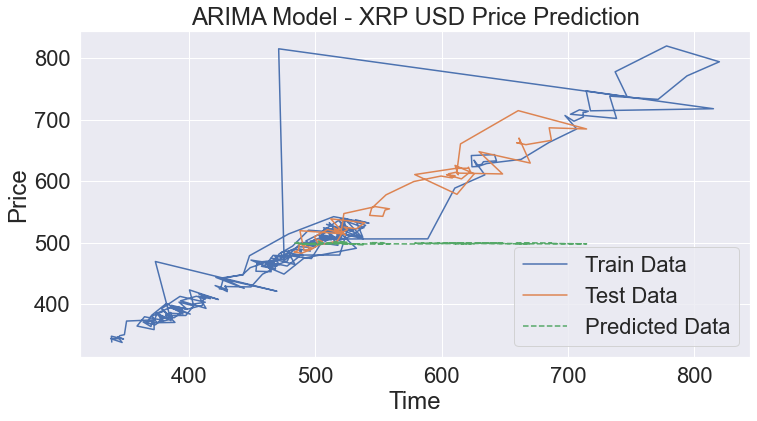

In [59]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['open'], train_data['close'], label='Train Data')
plt.plot(test_data['open'], test_data['close'], label='Test Data')
plt.plot(test_data['open'], forecast, label='Predicted Data', linestyle='--')
plt.title('ARIMA Model - XRP USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Data Scaling with model Training

In [60]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data[['close']])
test_data_scaled = scaler.transform(test_data[['close']])


In [61]:
# Fit an ARIMA model on scaled data
model = ARIMA(train_data_scaled, order=(5,1,2))  # You may need to tune these parameters
model_fit = model.fit()

c:\application\anaconda\envs\bigmart\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [62]:
# Predict the next 'n' periods on scaled data
n_periods = len(test_data_scaled)
forecast_scaled = model_fit.forecast(steps=n_periods)

In [63]:
# Reverse scaling for comparison
forecast = scaler.inverse_transform(forecast_scaled)
test_data_actual = test_data['close']

In [64]:
# Evaluate the model
mse = mean_squared_error(test_data_actual, forecast)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 94.84470942183806


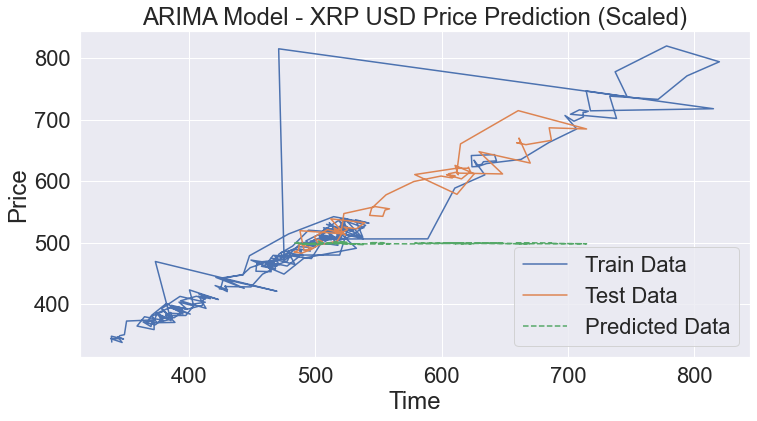

In [65]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['open'], train_data['close'], label='Train Data')
plt.plot(test_data['open'], test_data_actual, label='Test Data')
plt.plot(test_data['open'], forecast, label='Predicted Data', linestyle='--')
plt.title('ARIMA Model - XRP USD Price Prediction (Scaled)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## LSTM Model

In [66]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [67]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df[['close']])

In [68]:
# Create sequences for LSTM
def create_sequences(data, lookback):
    sequences, target = [], []
    for i in range(len(data) - lookback):
        sequences.append(data[i:i + lookback, 0])
        target.append(data[i + lookback, 0])
    return np.array(sequences), np.array(target)

In [104]:
lookback = 100  # You may need to tune this parameter
X, y = create_sequences(scaled_data, lookback)

In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [106]:
# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [107]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
# Use EarlyStopping to prevent overfitting and ModelCheckpoint to save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [129]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
5/5 [==============================] - 0s 75ms/step - loss: 0.0054 - val_loss: 6.4452e-04
Epoch 2/20
5/5 [==============================] - 0s 73ms/step - loss: 0.0055 - val_loss: 5.3613e-04
Epoch 3/20
5/5 [==============================] - 0s 81ms/step - loss: 0.0057 - val_loss: 9.2650e-04
Epoch 4/20
5/5 [==============================] - 0s 82ms/step - loss: 0.0058 - val_loss: 7.3802e-04
Epoch 5/20
5/5 [==============================] - 0s 72ms/step - loss: 0.0058 - val_loss: 7.4275e-04
Epoch 6/20
5/5 [==============================] - 0s 71ms/step - loss: 0.0053 - val_loss: 5.2826e-04
Epoch 7/20
5/5 [==============================] - 0s 74ms/step - loss: 0.0055 - val_loss: 6.1073e-04
Epoch 8/20
5/5 [==============================] - 0s 78ms/step - loss: 0.0053 - val_loss: 5.0124e-04
Epoch 9/20
5/5 [==============================] - 0s 76ms/step - loss: 0.0053 - val_loss: 5.3248e-04
Epoch 10/20
5/5 [==============================] - 0s 75ms/step - loss: 0.0053 - val_loss: 

In [130]:
from tensorflow.keras.models import load_model

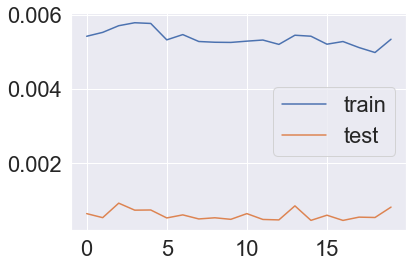

In [131]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

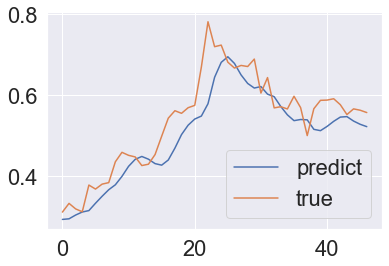

In [128]:
yhat = model.predict(X_test)
plt.plot(yhat, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

#### Use MinMaxScaler to normalize Close price to range from 0 to 1

In [132]:
values = final_df['close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [133]:
# Split 70% of data for training and 30% for testing
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size

train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

233 101


In [134]:
#Create function for creating dataset with look back

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [135]:
# Use look back &  Generate dataset for trainX, trainY, testX, testY
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

232
100


In [156]:
testX

array([[[0.3797468 ]],

       [[0.39863038]],

       [[0.37497413]],

       [[0.38970733]],

       [[0.3841045 ]],

       [[0.3851421 ]],

       [[0.38431215]],

       [[0.418759  ]],

       [[0.39510274]],

       [[0.35899568]],

       [[0.3320191 ]],

       [[0.3336792 ]],

       [[0.34592235]],

       [[0.3542229 ]],

       [[0.34779   ]],

       [[0.34301722]],

       [[0.34654486]],

       [[0.34654486]],

       [[0.3440547 ]],

       [[0.32973647]],

       [[0.28304625]],

       [[0.295497  ]],

       [[0.30130732]],

       [[0.31375802]],

       [[0.33720684]],

       [[0.33575428]],

       [[0.32060587]],

       [[0.3423947 ]],

       [[0.36522102]],

       [[0.38016188]],

       [[0.35090268]],

       [[0.36148584]],

       [[0.35194027]],

       [[0.34052706]],

       [[0.34779   ]],

       [[0.3401121 ]],

       [[0.33471668]],

       [[0.3565055 ]],

       [[0.3807844 ]],

       [[0.36708868]],

       [[0.3861797 ]],

       [[0.36169

In [136]:
# Reshape X for model training
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Model Building with hegiher epcos and batch size

In [137]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

- Plot line graph to show amount loss according the the epoch

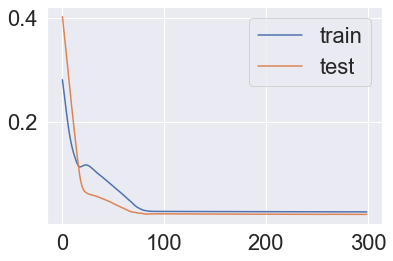

In [139]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

- Make prediction using textX and plotting line graph against testY

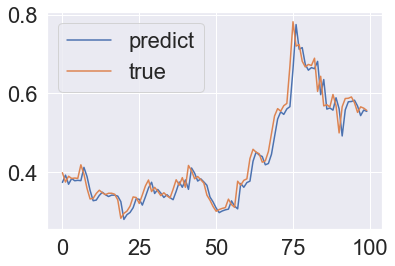

In [141]:
yhat = model.predict(testX)
plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

In [142]:
# Scaler Inverse Y back to normal value
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [144]:
### Check RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14.756


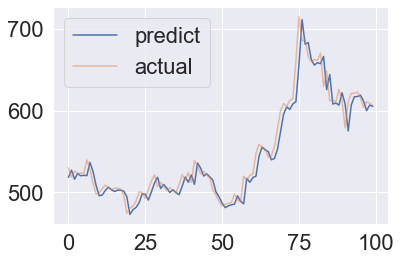

In [145]:
plt.plot(yhat_inverse, label='predict')
plt.plot(testY_inverse, label='actual', alpha=0.5)
plt.legend()
plt.show()

In [147]:
predictDates = final_df.tail(len(testX)).index

In [148]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [151]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [152]:
# Plot predicted and actual line graph
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

- LSTM with 300 epochs shows more accurate results as show in line chart above